<a href="https://colab.research.google.com/github/mtalaga20/448_Project_1/blob/master/EECS731HW1MichaelTalaga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Michael Talaga 
EECS 731
Homework 1

In [ ]:
#Packages
import pandas as pd
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import matplotlib.image as image
from PIL import Image, ImageOps
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Question 1
data_dir = '/content/gdrive/My Drive/TOP500_202111.xlsx - 58.csv'
df = pd.read_csv(f"{data_dir}")
df['Rmax [TFlop/s]'] = df['Rmax [TFlop/s]'].str.replace(r',', '')
df["Power (kW)"] = df["Power (kW)"].str.replace(r',', '') #For later use
df['Rmax [TFlop/s]'] = pd.to_numeric(df['Rmax [TFlop/s]'])
df = df.fillna({'Rmax [TFlop/s]' : 0})
df

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,Segment,Total Cores,Accelerator/Co-Processor Cores,Rmax [TFlop/s],Rpeak [TFlop/s],Nmax,Nhalf,HPCG [TFlop/s],Power (kW),Power Source,Power Efficiency [GFlops/Watts],Memory,Architecture,Processor,Processor Technology,Processor Speed (MHz),Operating System,OS Family,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,1.0,55,1,Supercomputer Fugaku,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",RIKEN Center for Computational Science,Fujitsu,Japan,2020,Research,"7,630,848",NaN,442010.00,"537,212.00","21,288,960",NaN,"16,004.50",29899.23,Submitted,14.78,NaN,MPP,A64FX 48C 2.2GHz,Fujitsu ARM,"2,200",Red Hat Enterprise Linux,Linux,None,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia,"50,831",179807
1,2,2.0,51,1,Summit,"IBM Power System AC922, IBM POWER9 22C 3.07GHz...",DOE/SC/Oak Ridge National Laboratory,IBM,United States,2018,Research,"2,414,592","2,211,840",148600.00,"200,794.88","16,473,600",NaN,"2,925.75",10096.00,Submitted,14.72,NaN,Cluster,IBM POWER9 22C 3.07GHz,Power,"3,070",RHEL 7.4,Linux,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,"48,553",179397
2,3,3.0,51,3,Sierra,"IBM Power System AC922, IBM POWER9 22C 3.1GHz,...",DOE/NNSA/LLNL,IBM / NVIDIA / Mellanox,United States,2018,Research,"1,572,480","1,382,400",94640.00,"125,712.00","11,902,464",NaN,"1,795.67",7438.28,Submitted,12.72,NaN,Cluster,IBM POWER9 22C 3.1GHz,Power,"3,100",Red Hat Enterprise Linux,Linux,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,"49,763",179398
3,4,4.0,47,1,Sunway TaihuLight,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway",National Supercomputing Center in Wuxi,NRCPC,China,2016,Research,"10,649,600",NaN,93014.59,"125,435.90","12,288,000",NaN,480.85,15371.00,Submitted,6.05,NaN,MPP,Sunway SW26010 260C 1.45GHz,ShenWei,"1,450",Sunway RaiseOS 2.0.5,Linux,None,260,Sunway,Sunway MPP,Sunway Cluster,Custom Interconnect,Sunway,Asia,"50,623",178764
4,5,5.0,57,5,Perlmutter,"HPE Cray EX235n, AMD EPYC 7763 64C 2.45GHz, NV...",DOE/SC/LBNL/NERSC,HPE,United States,2021,Research,"761,856","663,552",70870.00,"93,750.00","5,566,464",NaN,"1,905.44",2589.00,Submitted,27.37,NaN,MPP,AMD EPYC 7763 64C 2.45GHz,AMD Zen-3 (Milan),"2,450",HPE Cray OS,Linux,NVIDIA A100 SXM4 40 GB,64,AMD Milan,HPE Cray EX235n,HPE Cray EX,Gigabit Ethernet,Slingshot-10,North America,"48,429",179972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,429.0,51,122,NA5,"Lenovo C1040, Xeon E5-2673v4 20C 2.3GHz, 40G E...",Software Company (M),Lenovo,Netherlands,2018,Industry,"57,600",NaN,1649.11,"2,119.68","8,586,432",NaN,NaN,NaN,NaN,NaN,NaN,Cluster,Xeon E5-2673v4 20C 2.3GHz,Intel Broadwell,"2,300",Linux,Linux,None,20,Intel Xeon E5 (Broadwell),Lenovo C1040,Lenovo Cluster,Gigabit Ethernet,40G Ethernet,Europe,"50,503",179327
496,497,430.0,51,123,NA4,"Lenovo C1040, Xeon E5-2673v4 20C 2.3GHz, 40G E...",Software Company (M),Lenovo,Netherlands,2018,Industry,"57,600",NaN,1649.11,"2,119.68","8,586,432",NaN,NaN,NaN,NaN,NaN,NaN,Cluster,Xeon E5-2673v4 20C 2.3GHz,Intel Broadwell,"2,300",Linux,Linux,None,20,Intel Xeon E5 (Broadwell),Lenovo C1040,Lenovo Cluster,Gigabit Ethernet,40G Ethernet,Europe,"50,503",179328
497,498,431.0,51,124,NA3,"Lenovo C1040, Xeon E5-2673v4 20C 2.3GHz, 40G E...",Software Company (M),Lenovo,Netherlands,2018,Industry,"57,600",NaN,1649.11,"2,119.68","8,586,432",NaN,NaN,NaN,NaN,NaN,NaN,Cluster,Xeon E5-2673v4 20C 2.3GHz,Intel Broadwell,"2,300",Linux,Linux,None,20,Intel Xeon E5 (Broadwell),Lenovo C1040,Lenovo Cluster,Gigabit Ethernet,40G Ethernet,Europe,"50,503",179329
49

In [ ]:
nan_df = df[df.isna().any(axis=1)]
#nan_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             500 non-null    int64  
 1   Previous Rank                    430 non-null    float64
 2   First Appearance                 500 non-null    int64  
 3   First Rank                       500 non-null    int64  
 4   Name                             344 non-null    object 
 5   Computer                         500 non-null    object 
 6   Site                             500 non-null    object 
 7   Manufacturer                     500 non-null    object 
 8   Country                          500 non-null    object 
 9   Year                             500 non-null    int64  
 10  Segment                          500 non-null    object 
 11  Total Cores                      500 non-null    object 
 12  Accelerator/Co-Process

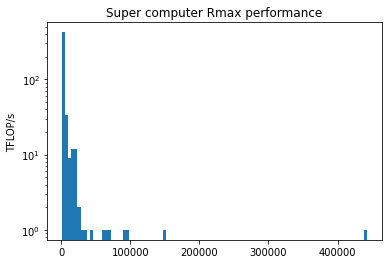

In [ ]:
#Histogram of TFLOP power
plt.hist(df["Rmax [TFlop/s]"], bins=100)
#plt.xlabel("x")
plt.ylabel("TFLOP/s")
plt.title("Super computer Rmax performance")
plt.yscale('log')
plt.show()

Top 5 countries with most computing power 
0    United States
1            Japan
2            China
3          Germany
4           France
Name: Country, dtype: object


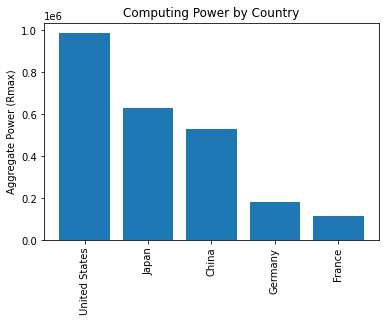

In [ ]:
#Super computers
group = df.groupby(['Country']).sum()
group = group.sort_values(by=['Rmax [TFlop/s]'], ascending=False)
group.reset_index(inplace=True)

plt.bar(group['Country'][:5], group["Rmax [TFlop/s]"][:5])
plt.ylabel("Aggregate Power (Rmax)")
plt.title("Computing Power by Country")
plt.xticks(group['Country'][:5], rotation="vertical", size=10)

print(f"Top 5 countries with most computing power \n{group['Country'][:5]}")
plt.show()


In [ ]:
#Computers per year
year_count = df.groupby(['Year']).count()
#missing_year = pd.Series(["2012"], name="Year")
#year_count = pd.concat([year_count, missing_year])
print(year_count["Rank"])
year_count.reset_index(inplace=True)
plt.plot(year_count['Year'], year_count['Rank'])
plt.xticks(year_count['Year'], rotation="vertical")
plt.xlabel("Year")
plt.title("Supercomputers Introduced Since 2010")
#plt.grid()
plt.show()


NameError: ignored

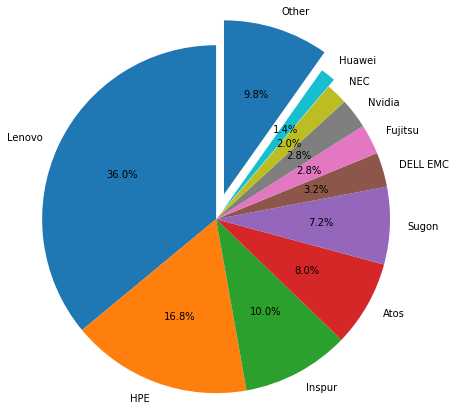

In [ ]:
manufacturers = df.groupby(['Manufacturer']).count()
manufacturers = manufacturers.sort_values(by=['Rank'], ascending=False)
manufacturers.reset_index(inplace=True)

#Rank
manuf = manufacturers["Rank"][:10]
remaining = manufacturers["Rank"][10:].sum()
remaining_df = pd.Series([remaining], name="Rank", index=[10])
manuf = pd.concat([manuf, remaining_df])

#Labels of manufacturers
label = manufacturers["Manufacturer"][:10]
other_df = pd.Series(["Other"], name="Manufacturer", index=[10])
label = pd.concat([label, other_df])

plt.pie(manuf[:11], labels=label, autopct='%.1f%%', explode=[0,0,0,0,0,0,0,0,0,0.1,0.3],
        counterclock = True,
        startangle = 90,
        radius=2)
plt.show()

#The explode attribute may have been working differently on my comupter, but an explode
# value of 1 nearly went off of the screen

Supercomputer count with power measurements in kW: 179


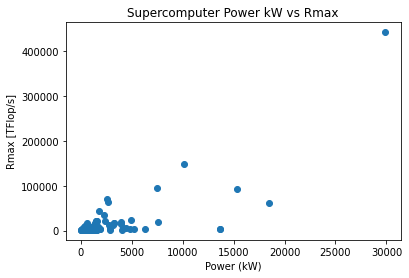

In [ ]:
#df["Power (kW)"] = df["Power (kW)"].str.replace(r',', '')
df["Power (kW)"] = pd.to_numeric(df["Power (kW)"])
kw_df = df[df["Power (kW)"].notna()]
#kw_df.info()
count = kw_df["Power (kW)"].count()
print(f"Supercomputer count with power measurements in kW: {count}")

plt.scatter(kw_df["Power (kW)"], kw_df['Rmax [TFlop/s]'])
plt.xticks(rotation="horizontal")
plt.title("Supercomputer Power kW vs Rmax")
plt.xlabel("Power (kW)")
plt.ylabel('Rmax [TFlop/s]')
plt.show()

(1000, 1000, 3)


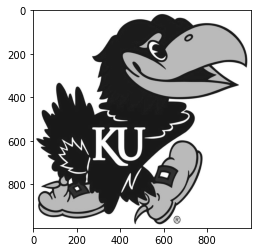

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


In [ ]:
#Question 2
# Was unable to make this image gray after several attempts. Color appeared as yellow, blue, and green, but I found the cmap function which
#could convert to gray.#
jayhawk = image.imread('/content/gdrive/My Drive/jayhawks_logosq.jpg')
print(jayhawk.shape)
X = np.dot(jayhawk[..., :3], [.299, .587, .114])
plt.imshow(X, cmap = plt.get_cmap(name = 'gray'))
plt.show()
print(X)
#SVD
U, S, Vt = svd(X)


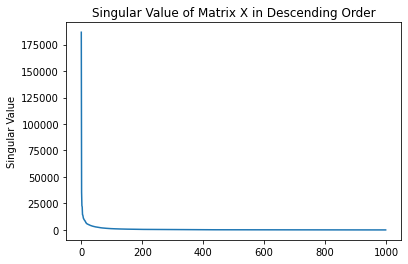

In [ ]:
s_sorted = sorted(S, reverse=True)
count_row = [x for x in range(S.size)]
plt.plot(count_row, s_sorted)
plt.title("Singular Value of Matrix X in Descending Order")
plt.ylabel("Singular Value")
plt.show()


(1000, 10) (10, 10) (10, 1000)
(1000, 50) (50, 50) (50, 1000)
(1000, 100) (100, 100) (100, 1000)


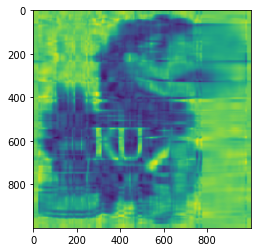

In [ ]:
#Low-rank r
r = [10, 50, 100]
ranks = []
#Image 1
diag_s = np.diag(s_sorted)
#print(diag_s.shape)
for i in r:
  Xr = X[:i, :]
  Ur = U[:, :i]
  Sr = diag_s[:i, :i]
  VrT = Vt[:i, :]
  print(Ur.shape, Sr.shape, VrT.shape)
  rank = (Ur@Sr@VrT)
  ranks.append(rank)
plt.imshow(ranks[0])

#Modification to r changed the clarity. Low r was very blurry.



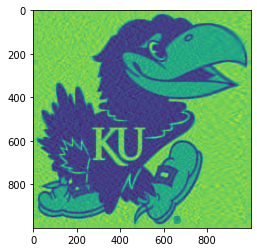

In [ ]:
plt.imshow(ranks[1])
#50% retained

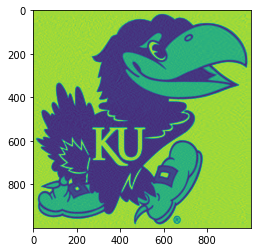

In [ ]:
plt.imshow(ranks[2])
#100% retained

(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)


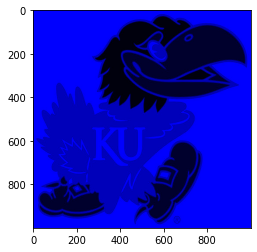

In [ ]:
color_layers = []

for i in range(3):
  color = np.zeros(jayhawk.shape, dtype="uint8")
  color[:, :, i] = jayhawk[:,:,i]
  color_layers.append(color)
  print(color.shape)
plt.imshow(color)


In [ ]:
r = [3, 40, 200]
def r_rank(matrix_layer):
  U, S, Vt = svd(matrix_layer)
  #s_sorted = sorted(S, reverse=True)
  diag_s = np.diag(S)
  Xr = matrix_layer[:r[0], :]
  Ur = U[:, :r[0]]
  Sr = S[:r[0], :r[0]]
  VrT = Vt[:r[0], :]  
  return imshow((Ur@Sr@VrT))

r_rank(color_layers[0])

ValueError: ignored